In [43]:
using Clustering
using VegaLite
using VegaDatasets
using Statistics
using CSV
using Distances

In [9]:
using DataFrames;
airports = CSV.read("airports.csv",DataFrame)

Row,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
,String,String,String,String,String,Float64,Float64
1,ABQ,Albuquerque International,Albuquerque,NM,USA,35.0402,-106.609
2,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.1743,-149.996
3,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.6404,-84.4269
4,AUS,Austin-Bergstrom International,Austin,TX,USA,30.1945,-97.6699
5,BDL,Bradley International,Windsor Locks,CT,USA,41.9389,-72.6832
6,BHM,Birmingham International,Birmingham,AL,USA,33.5629,-86.7535
7,BNA,Nashville International,Nashville,TN,USA,36.1245,-86.6782
8,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.3643,-71.0052
9,BUF,Buffalo Niagara Intl,Buffalo,NY,USA,42.9405,-78.7322


In [10]:
names(airports)

7-element Vector{String}:
 "IATA"
 "AIRPORT"
 "CITY"
 "STATE"
 "COUNTRY"
 "LATITUDE"
 "LONGITUDE"

In [17]:
X = airports[!,[:LATITUDE, :LONGITUDE]]
Matrix(X)'

2×341 adjoint(::Matrix{Float64}) with eltype Float64:
   35.0402    61.1743   33.6404   30.1945  …   36.2819    59.5034    32.6566
 -106.609   -149.996   -84.4269  -97.6699     -94.3068  -139.66    -114.606

In [18]:
clusters = kmeans(Matrix(X)', 12)

KmeansResult{Matrix{Float64}, Float64, Int64}([40.9273947025 31.64923495058824 … 42.14789883408164 46.42083231999999; -109.47283964499998 -83.65995836607844 … -86.74327310469387 -97.29181022249999], [1, 4, 2, 5, 7, 2, 2, 7, 7, 8  …  5, 2, 1, 2, 2, 4, 1, 9, 4, 8], [42.85926392791953, 2.168858424440259, 4.553182868312433, 0.7971003991842736, 9.370578661430045, 13.232586193087627, 29.137463679544453, 22.665510126949812, 17.10607850046472, 24.54247956517065  …  6.112155353010166, 17.443490180246954, 0.23805044564505806, 0.8980994182311406, 9.570276662409015, 282.3929557960146, 16.85051458836824, 5.825537599252129, 82.4907807496711, 66.45335148735467], [40, 51, 1, 19, 35, 7, 49, 44, 21, 5, 49, 20], [40, 51, 1, 19, 35, 7, 49, 44, 21, 5, 49, 20], 9929.657946840285, 21, true)

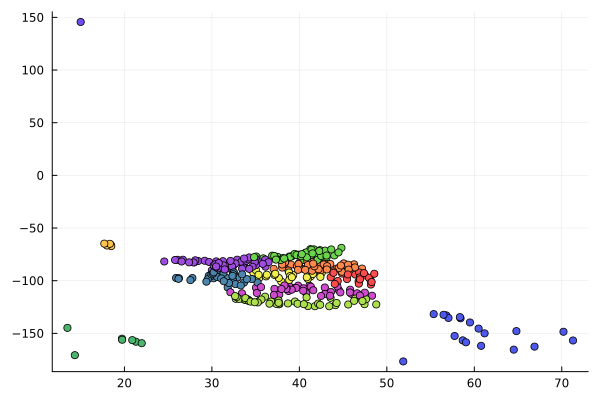

In [20]:
using Plots
scatter(airports.LATITUDE,airports.LONGITUDE,marker_z = clusters.assignments,
        color =:lightrainbow, legend = false)

In [22]:
M = Matrix(X)'

2×341 adjoint(::Matrix{Float64}) with eltype Float64:
   35.0402    61.1743   33.6404   30.1945  …   36.2819    59.5034    32.6566
 -106.609   -149.996   -84.4269  -97.6699     -94.3068  -139.66    -114.606

In [36]:
d = pairwise(Euclidean(),M, M, dims = 2)

K = kmedoids(d,12)

KmedoidsResult{Float64}([93, 237, 309, 164, 221, 147, 17, 335, 49, 5, 27, 99], [1, 6, 8, 7, 10, 8, 9, 10, 11, 12  …  7, 8, 1, 8, 8, 3, 2, 7, 3, 12], [4.190988774195525, 8.769487191703185, 3.0807235477251114, 2.775873501619785, 0.0, 4.451875231254573, 5.982154969506998, 1.7311489069164645, 4.194883235755749, 1.4169755156456796  …  1.5309292754675083, 5.080710460234459, 2.908293918283701, 0.0, 3.262431283685149, 3.0442519395847523, 6.13404156477261, 4.274853534294487, 4.9508817328269075, 5.246083773072609], [30, 25, 8, 22, 7, 11, 47, 50, 50, 23, 35, 33], 1625.248482546971, 4, true)

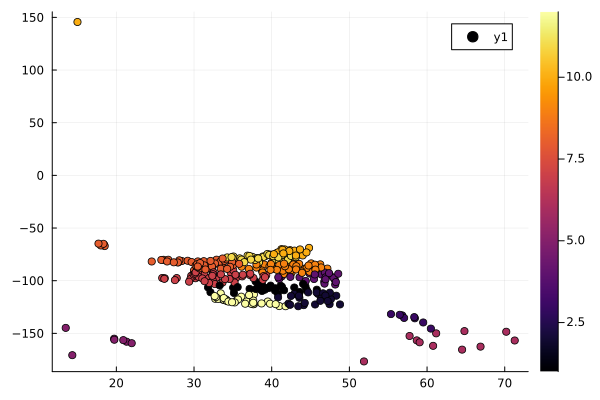

In [37]:
scatter(airports.LATITUDE, airports.LONGITUDE, marker_z = K.assignments,
        colors=:2)